In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:\PyCharmProject\Largest_Malls\Largest-Malls.csv')

In [6]:
df.head()

,Rank,Mall,Country,City (metropolitan area),Year opened,Gross leasable area (GLA),Shops
0,1,Iran Mall,Iran,Tehran,2018,"1,950,000 m2 (21,000,000 sq ft)","2,500"
1,2,IOI City Mall,Malaysia,Putrajaya,2014,"821,000 m2 (8,840,000 sq ft)",650
2,3,South China Mall,China,Dongguan,2005,"659,612 m2 (7,100,000 sq ft)","2,350"
3,4,Isfahan City Center,Iran,Isfahan,2012,"650,000 m2 (7,000,000 sq ft)",350
4,5,SM Mall of Asia,Philippines,Pasay (Metro Manila),2006,"589,891 m2 (6,349,530 sq ft)","3,500"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Rank                       56 non-null     int64 
 1   Mall                       56 non-null     object
 2   Country                    56 non-null     object
 3   City (metropolitan area)   56 non-null     object
 4   Year opened                56 non-null     object
 5   Gross leasable area (GLA)  56 non-null     object
 6   Shops                      56 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.2+ KB


In [9]:
df.isna().sum()

Rank                         0
Mall                         0
Country                      0
City (metropolitan area)     0
Year opened                  0
Gross leasable area (GLA)    0
Shops                        0
dtype: int64

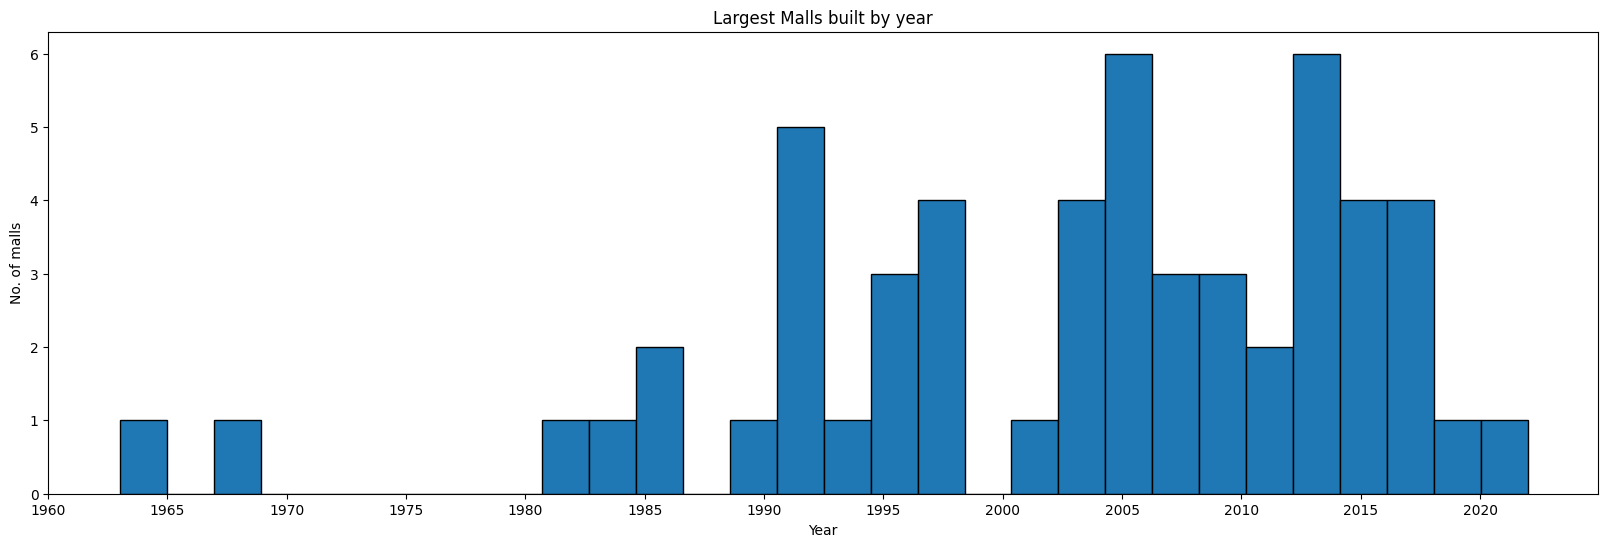

In [23]:
df['Year opened'] = pd.to_numeric(df['Year opened'], errors='coerce')
plt.figure(figsize=(20, 6))
df['Year opened'].plot(kind='hist', bins=30, edgecolor='black')
plt.xticks(np.arange(1960, df['Year opened'].max(), 5))
plt.xlabel('Year')
plt.ylabel('No. of malls')
plt.title('Largest Malls built by year')
plt.show()

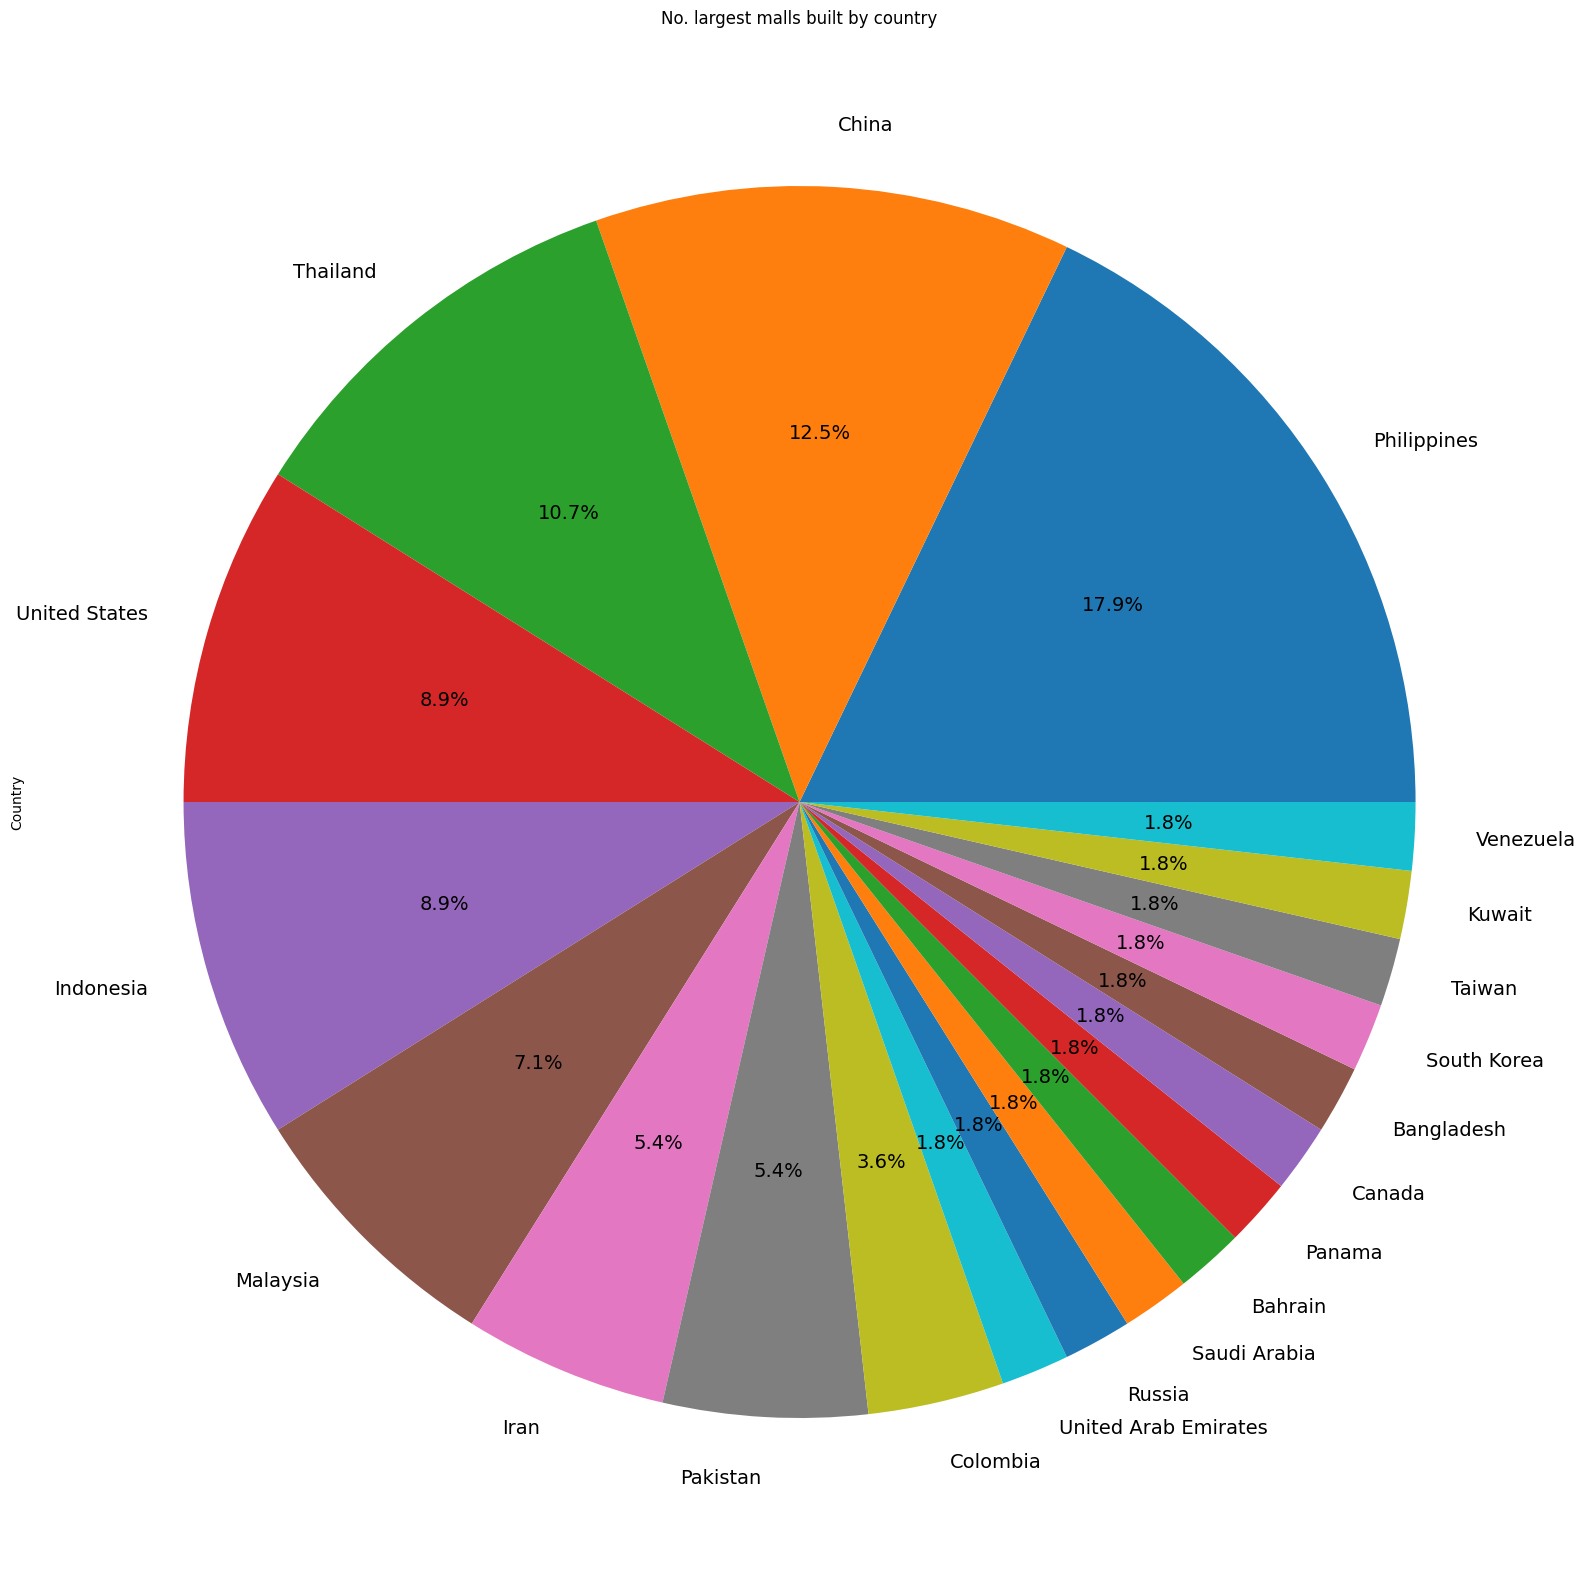

In [30]:
malls_by_country=df['Country'].value_counts()
plt.figure(figsize=(20, 20))
malls_by_country.plot(kind='pie',autopct='%1.1f%%', textprops={'fontsize':14})
plt.title('No. largest malls built by country')
plt.show()

In [32]:
area_grouped=df.groupby(by='Country')['Gross leasable area (GLA)'].sum()

In [34]:
print(area_grouped)

Country
Bahrain                                      273,000 m2 (2,940,000 sq ft)
Bangladesh                                   380,000 m2 (4,100,000 sq ft)
Canada                                       350,000 m2 (3,800,000 sq ft)
China                   659,612 m2 (7,100,000 sq ft)565,000 m2 (6,080,...
Colombia                280,000 m2 (3,000,000 sq ft)250,000 m2 (2,700,...
Indonesia               360,000 m2 (3,900,000 sq ft)336,279 m2 (3,619,...
Iran                    1,950,000 m2 (21,000,000 sq ft)650,000 m2 (7,0...
Kuwait                                       425,000 m2 (4,570,000 sq ft)
Malaysia                821,000 m2 (8,840,000 sq ft)519,328 m2 (5,590,...
Pakistan                340,000 m2 (3,700,000 sq ft)310,000 m2 (3,300,...
Panama                                       380,000 m2 (4,100,000 sq ft)
Philippines             589,891 m2 (6,349,530 sq ft)497,213 m2 (5,351,...
Russia                                       258,673 m2 (2,784,330 sq ft)
Saudi Arabia                  

In [47]:
df['Area (m2)']=df['Gross leasable area (GLA)'].str.split(' ').str[0]

In [54]:
area_grouped=df.groupby(by='Country')['Area (m2)'].sum()

In [51]:
#df['Area (m2)'] = df['Area (m2)'].str.replace(',', '').astype(float)

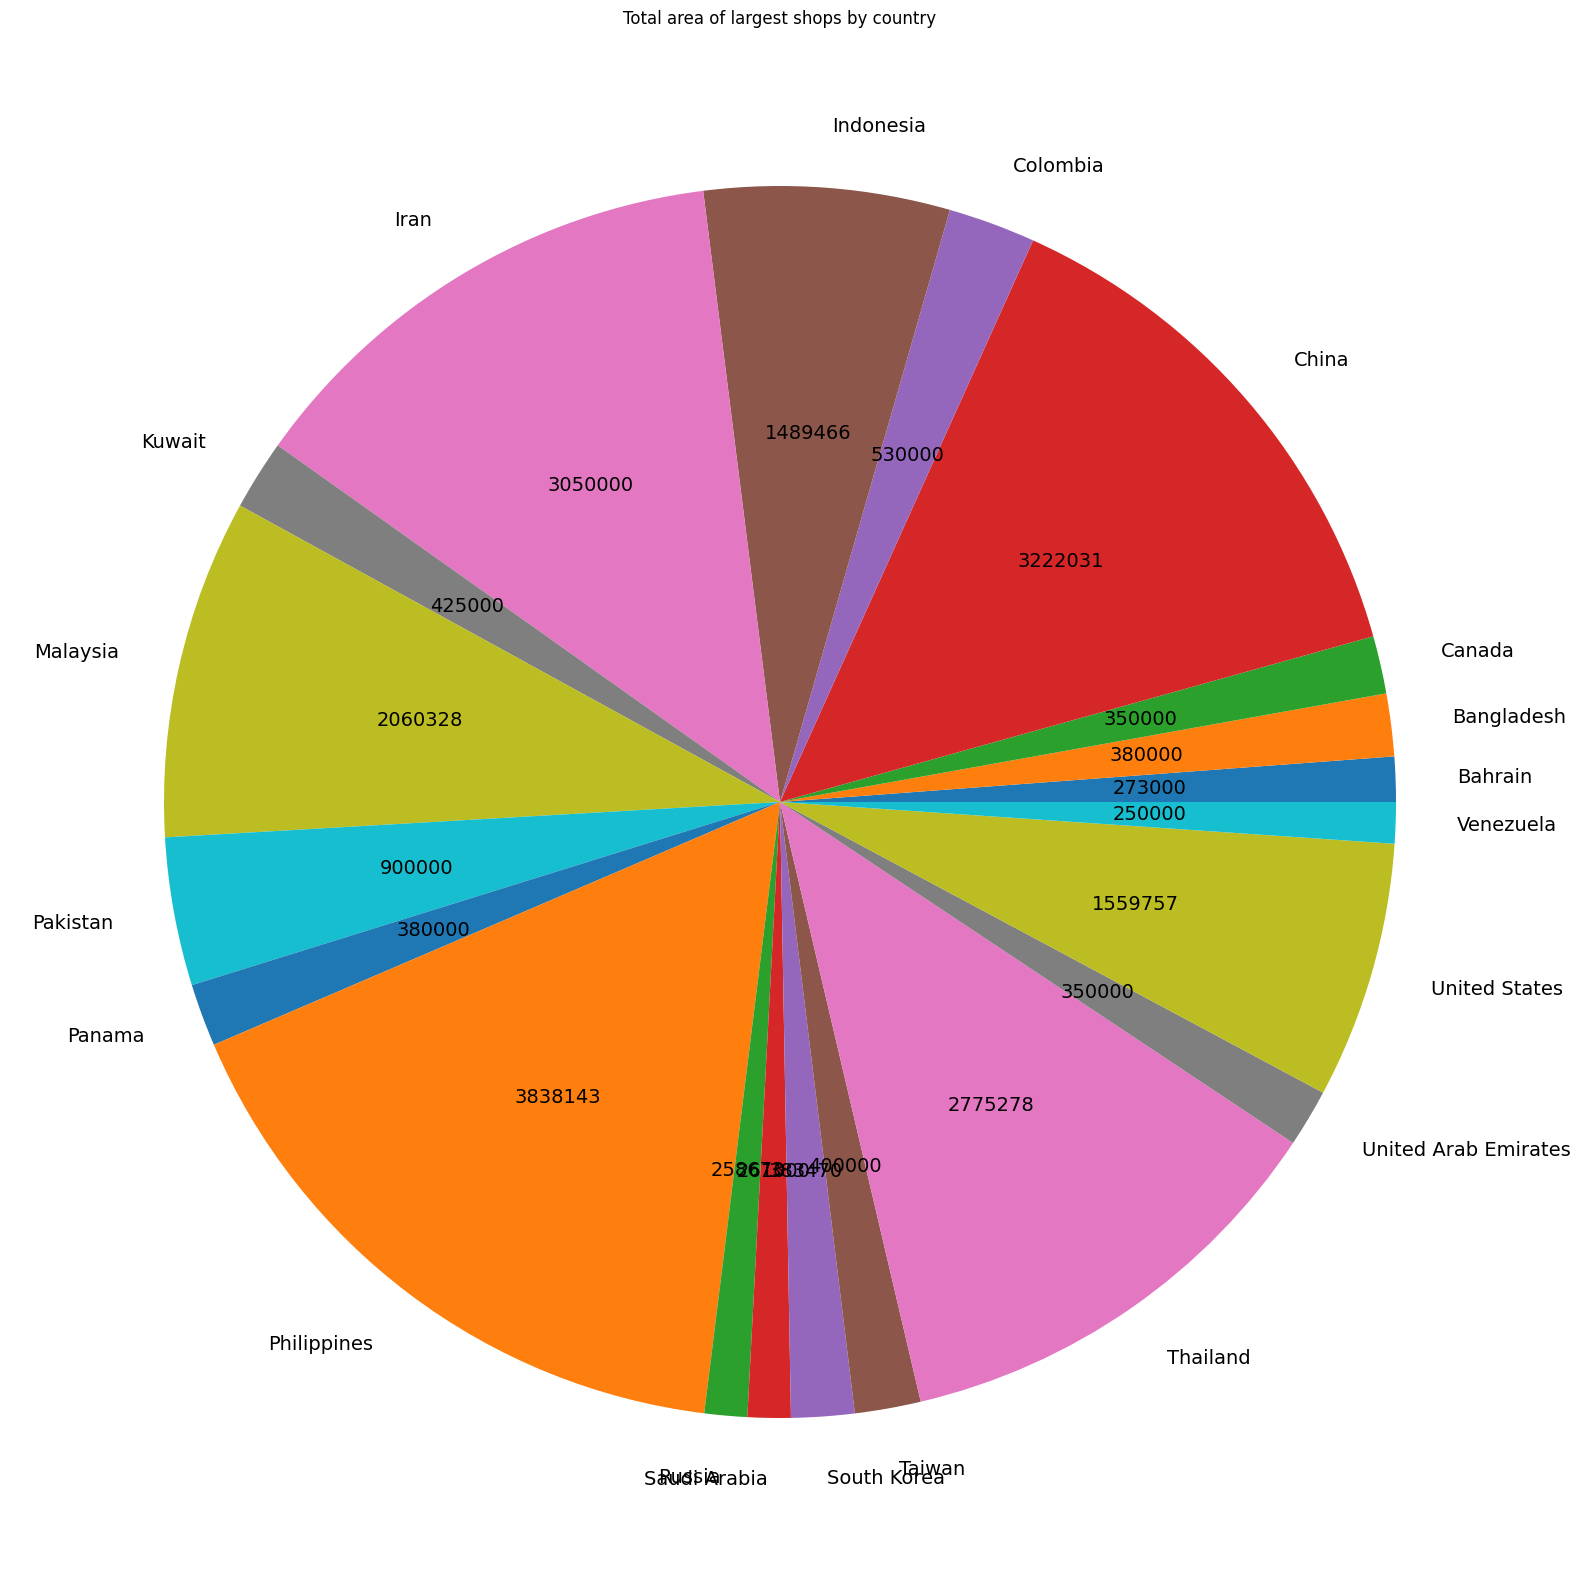

In [70]:
plt.figure(figsize=(20, 20))
area_grouped.plot(kind='pie',autopct=lambda x: '{:.0f}'.format(x*df['Area (m2)'].sum()/100), textprops={'fontsize':14})
plt.title('Total area of largest shops by country')
plt.ylabel('')
plt.show()

In [66]:
#df['Shops'] = df['Shops'].str.replace(',', '').astype(float)
shops_grouped=df.groupby(by='Country')['Shops'].sum()

In [67]:
print(shops_grouped)

Country
Bahrain                  680.0
Bangladesh               200.0
Canada                   800.0
China                   7230.0
Colombia                 400.0
Indonesia               1660.0
Iran                    3205.0
Kuwait                  1100.0
Malaysia                2353.0
Pakistan                 400.0
Panama                   200.0
Philippines             8330.0
Russia                   250.0
Saudi Arabia             187.0
South Korea              200.0
Taiwan                   250.0
Thailand                2250.0
United Arab Emirates     400.0
United States           1506.0
Venezuela                300.0
Name: Shops, dtype: float64


Text(0, 0.5, 'No. shops')

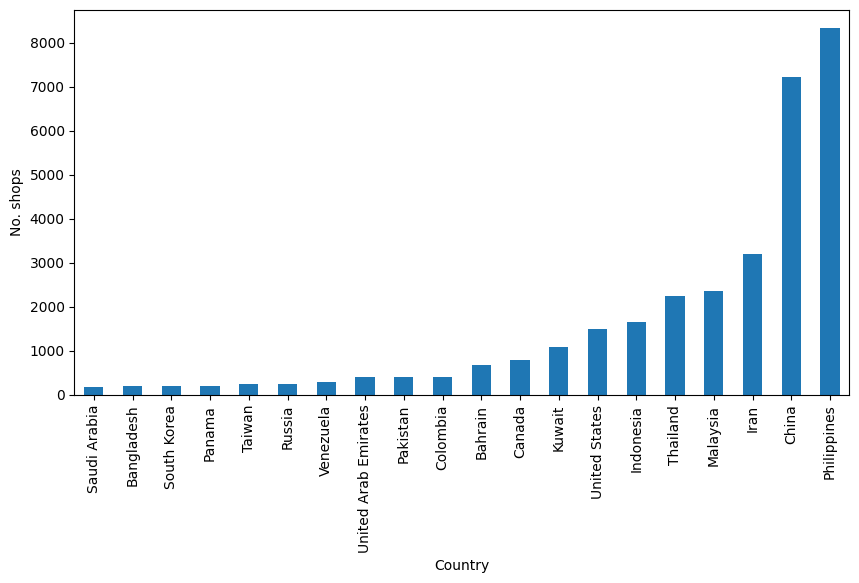

In [86]:
shops_grouped=shops_grouped.sort_values()
plt.figure(figsize=(10, 5))
shops_grouped.plot(kind='bar', stacked=True)
plt.ylabel('No. shops')

In [77]:
print(malls_by_country)

Philippines             10
China                    7
Thailand                 6
United States            5
Indonesia                5
Malaysia                 4
Iran                     3
Pakistan                 3
Colombia                 2
United Arab Emirates     1
Russia                   1
Saudi Arabia             1
Bahrain                  1
Panama                   1
Canada                   1
Bangladesh               1
South Korea              1
Taiwan                   1
Kuwait                   1
Venezuela                1
Name: Country, dtype: int64


In [79]:
shops_per_mall_by_country=shops_grouped.div(malls_by_country)

In [80]:
print(shops_per_mall_by_country)

Bahrain                  680.000000
Bangladesh               200.000000
Canada                   800.000000
China                   1032.857143
Colombia                 200.000000
Indonesia                332.000000
Iran                    1068.333333
Kuwait                  1100.000000
Malaysia                 588.250000
Pakistan                 133.333333
Panama                   200.000000
Philippines              833.000000
Russia                   250.000000
Saudi Arabia             187.000000
South Korea              200.000000
Taiwan                   250.000000
Thailand                 375.000000
United Arab Emirates     400.000000
United States            301.200000
Venezuela                300.000000
dtype: float64


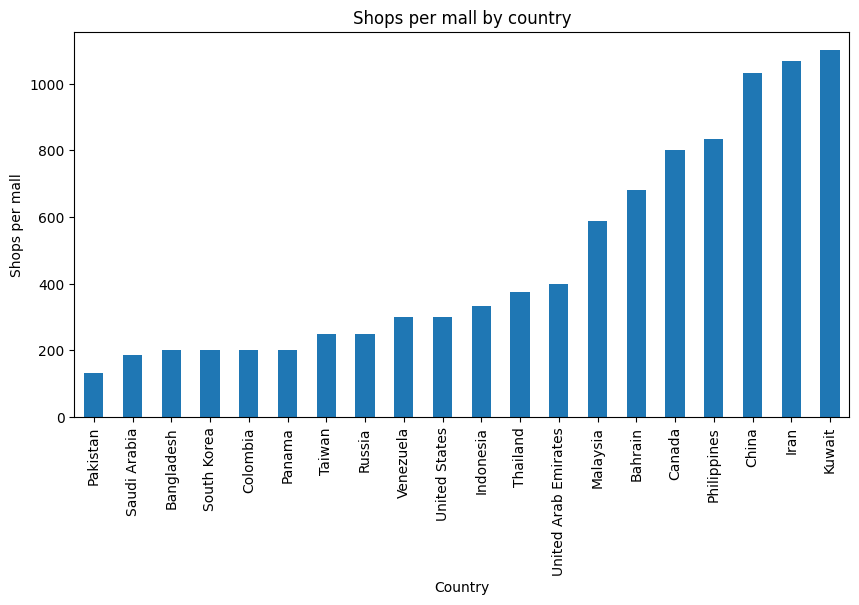

In [85]:
shops_per_mall_by_country=shops_per_mall_by_country.sort_values()
plt.figure(figsize=(10, 5))
shops_per_mall_by_country.plot(kind='bar', stacked=True)
plt.ylabel('Shops per mall')
plt.xlabel('Country')
plt.title('Shops per mall by country')
plt.show()